<a href="https://colab.research.google.com/github/gnc506/Skills_Assessment/blob/main/Skills_Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
articles_data = pd.read_csv('/articles.Dengue.csv')
authors_data = pd.read_csv('/authors.Dengue.csv')
paper_count_data = pd.read_csv('/paper_counts.csv')

## WHO IS MOST ACTIVE

In [6]:
#create a dataframe which counts the number of articles an another has been involved with
author_activity = authors_data.groupby(['AuthorForename', 'AuthorLastname']).size().reset_index(name='ArticleCount')
most_active_authors = author_activity.sort_values(by='ArticleCount', ascending=False)

#drop nan values
most_active_authors.dropna()


,AuthorForename,AuthorLastname,ArticleCount
10427,Eva,Harris,128
10046,Eng Eong,Ooi,66
5313,Cameron P,Simmons,66
1201,Alan L,Rothman,64
35526,Subhash G,Vasudevan,59
...,...,...,...
15615,Jarinee,Tongshoob,1
15614,Jarin,Taslem Mourosi,1
15613,Jared D,Pitts,1
15611,Jared,Tur,1


In [7]:
#find top 20 author contributions and create a viz
most_active_20 = most_active_authors.head(20)
most_active_20


#create a new column in df of author full name for easier distinguishing
most_active_20['Author Full Name'] = most_active_20['AuthorForename'] + ' ' + most_active_20['AuthorLastname']
most_active_20


<ipython-input-7-70aa0c3a30b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_active_20['Author Full Name'] = most_active_20['AuthorForename'] + ' ' + most_active_20['AuthorLastname']


,AuthorForename,AuthorLastname,ArticleCount,Author Full Name
10427,Eva,Harris,128,Eva Harris
10046,Eng Eong,Ooi,66,Eng Eong Ooi
5313,Cameron P,Simmons,66,Cameron P Simmons
1201,Alan L,Rothman,64,Alan L Rothman
35526,Subhash G,Vasudevan,59,Subhash G Vasudevan
28864,Pei-Yong,Shi,54,Pei-Yong Shi
35373,Stephen J,Thomas,53,Stephen J Thomas
2991,Annelies,Wilder-Smith,53,Annelies Wilder-Smith
37438,Tomohiko,Takasaki,51,Tomohiko Takasaki
3322,Aravinda M,de Silva,50,Aravinda M de Silva


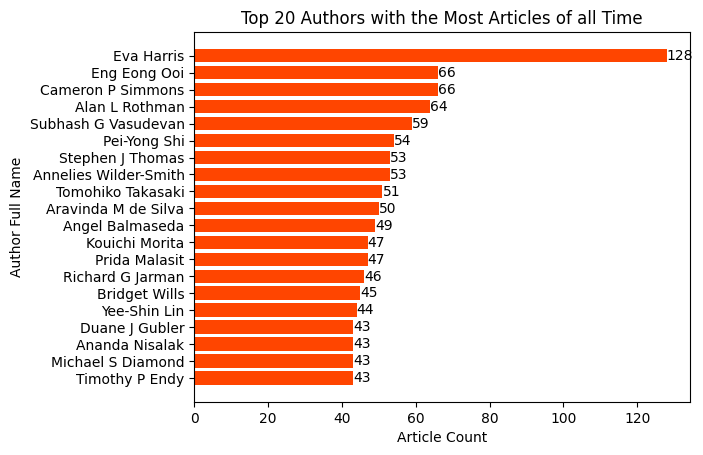

In [8]:
#sort the dataframe frmo highest to lowest article count
most_active_20 = most_active_20.sort_values(by = 'ArticleCount', ascending = True)

#creat a horizonyal bar chart displaying the top 20 authors
fig, ax = plt.subplots()
bars = ax.barh(most_active_20['Author Full Name'], most_active_20['ArticleCount'], color='orangered')
for bar, value in zip(bars, most_active_20['ArticleCount']):
  plt.text(bar.get_width(),bar.get_y() + bar.get_height()/2, value, ha ='left', va = 'center', color = 'black', fontsize = 10)
  ax.set_xlabel('Article Count')
  ax.set_ylabel('Author Full Name')
  ax.set_title('Top 20 Authors with the Most Articles of all Time')

In [10]:
#Top 20 active reasearchers (based on number of articles published in the last 5 years)

#Merging both the datasets
merged_df = pd.merge(articles_data, authors_data, on = 'PMID')
merged_df.head(20)


#Selecting articles posted between 2018 and 2024
selected_rows = merged_df[(merged_df['Year'] >= 2018) & (merged_df['Year'] <= 2024)]
author_article_counts = selected_rows.groupby(['AuthorForename', 'AuthorLastname']).agg({'PMID': 'count'}).reset_index()
aac = author_article_counts.sort_values(by = 'PMID', ascending = False)
aac = aac.rename(columns ={'PMID':'No. of articles published'})

#show table of top 20 authors in the past 5 years
top_20_articles = aac.head(20)
top_20_articles

,AuthorForename,AuthorLastname,No. of articles published
6022,Eva,Harris,38
6791,Gabriela,Paz-Bailey,35
20317,Stephen J,Thomas,26
17262,R Tedjo,Sasmono,23
11102,Kouichi,Morita,21
5782,Eng Eong,Ooi,21
17899,Richard G,Jarman,20
21721,Tyler M,Sharp,19
3052,Cameron P,Simmons,19
11428,Laura E,Adams,19


In [11]:
#Create new column of first and last name for visualisations
top_20_articles['Author Full Name'] = top_20_articles['AuthorForename'] + ' ' + top_20_articles['AuthorLastname']
top_20_articles

<ipython-input-11-8b83ec4aea00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_articles['Author Full Name'] = top_20_articles['AuthorForename'] + ' ' + top_20_articles['AuthorLastname']


,AuthorForename,AuthorLastname,No. of articles published,Author Full Name
6022,Eva,Harris,38,Eva Harris
6791,Gabriela,Paz-Bailey,35,Gabriela Paz-Bailey
20317,Stephen J,Thomas,26,Stephen J Thomas
17262,R Tedjo,Sasmono,23,R Tedjo Sasmono
11102,Kouichi,Morita,21,Kouichi Morita
5782,Eng Eong,Ooi,21,Eng Eong Ooi
17899,Richard G,Jarman,20,Richard G Jarman
21721,Tyler M,Sharp,19,Tyler M Sharp
3052,Cameron P,Simmons,19,Cameron P Simmons
11428,Laura E,Adams,19,Laura E Adams


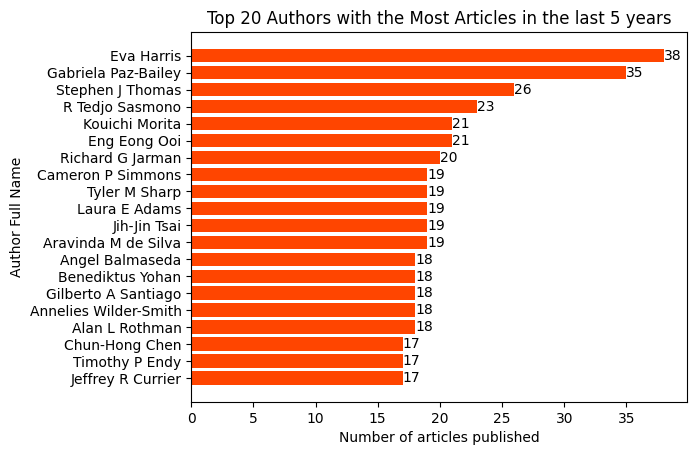

In [12]:
#order the dataframe from highest articles published to lowest
top_20_articles = top_20_articles.sort_values(by = 'No. of articles published', ascending = True)

#create a horixonatl bar chart to show top 20 authors with the most articles in the last 5 years
fig, ax = plt.subplots()
bars = ax.barh(top_20_articles['Author Full Name'], top_20_articles['No. of articles published'], color='orangered')
for bar, value in zip(bars, top_20_articles['No. of articles published']):
  plt.text(bar.get_width(),bar.get_y() + bar.get_height()/2, value, ha ='left', va = 'center', color = 'black', fontsize = 10)
  ax.set_xlabel('Number of articles published')
  ax.set_ylabel('Author Full Name')
  ax.set_title('Top 20 Authors with the Most Articles in the last 5 years')

In [ ]:
#DID NOT ADD THIS IN THE END
#Merging both the datasets
#merged_df = pd.merge(articles_data, authors_data, on = 'PMID')
#merged_df['Author Full Name'] = authors_data['AuthorForename'] + ' ' + authors_data['AuthorLastname']
#create cumulative freq
#merged_df['Author_cumulative']= merged_df.groupby('Author Full Name').cumcount() + 1
#Idenitfy certain values from the dataframe and make a new dataframe out of them
#mask = merged_df['Author Full Name'].isin(['Eva Harris', 'Cameron P Simmons', 'Alan L Rothman', 'Subhash G Vasudevan', 'Pei-Yong Shi', 'Stephan J Thomas'])
#top_20_oat = merged_df[mask].copy()
#create line graph of the cumulative frequency
#active_years = px.line(top_20_oat, x='Year', y='Author_cumulative', color='Author Full Name')
#active_years